In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",temperature=0.1)

In [4]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [5]:
def create_outine(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f"Create an outline for a blog post titled {title}"
    outline = llm.invoke(prompt).content
    state['outline'] = outline
    return state

In [6]:
def Create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f"Create a blog post titled {title} with the following outline: {outline}"
    content = llm.invoke(prompt).content
    state['content'] = content
    return state

In [7]:
graph = StateGraph(BlogState)
graph.add_node("create_outine",create_outine)
graph.add_node("Create_blog",Create_blog)
graph.add_edge(START, "create_outine")
graph.add_edge("create_outine", "Create_blog")
graph.add_edge("Create_blog", END)
app = graph.compile()

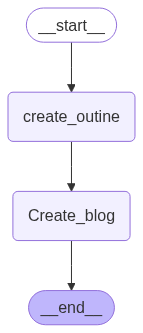

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
intial_state = {"title":"Rise of AI in the world"}
final_state = app.invoke(intial_state)
print(final_state['content'])

# Rise of AI in the World

**I. Introduction**

Venture capital investments in artificial intelligence (AI) surged past $90 billion in 2022, a testament to its explosive growth and transformative potential.  AI, encompassing technologies like machine learning, deep learning, and natural language processing, is rapidly changing how we live, work, and interact with the world.  These technologies enable computers to learn from data, make decisions, and even mimic human-like intelligence. This post argues that AI's rapid advancement is profoundly reshaping our world, presenting both incredible opportunities and significant challenges.


**II. AI's Impact Across Industries**

AI's influence spans numerous sectors, revolutionizing processes and creating new possibilities.  In **healthcare**, AI-powered diagnostic tools analyze medical images with remarkable accuracy, accelerating diagnosis and improving treatment outcomes.  Drug discovery is also being accelerated through AI's ability to ana

In [10]:
print(final_state['outline'])

## Blog Post Outline: Rise of AI in the World

**I. Introduction (approx. 100 words)**

*   Hook: Start with a compelling statistic or anecdote showcasing AI's impact.  (e.g.,  the rapid growth of AI investments, a specific AI application changing a field, etc.)
*   Brief definition of AI and its key capabilities (machine learning, deep learning, natural language processing, etc.). Avoid overly technical jargon.
*   Thesis statement: Briefly state the main argument – that AI is rapidly transforming the world and its impact is both profound and multifaceted.


**II.  AI's Impact Across Industries (approx. 300 words)**

*   **A. Healthcare:**  Examples: AI-powered diagnostics, drug discovery, personalized medicine, robotic surgery.  Mention both benefits (faster diagnosis, improved treatment) and potential drawbacks (data privacy, job displacement).
*   **B. Finance:** Examples: Fraud detection, algorithmic trading, risk management, customer service chatbots.  Highlight efficiency gains 